In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Exercise 13.1
Using MLE, the likelihood function of the sample is $\prod_{i=1}^M \lambda e ^{-\lambda x_i}$ and the log-likelihood is $L = \sum_{i=1}^{M} \log (\lambda) - \lambda x_i = 7 \log(\lambda) - 77\lambda$. Differentiating w.r.t. $\lambda$ and solving when the derivative is $0$,
$$
\frac{dL}{d\lambda} = \frac{d}{d\lambda} 7 \log(\lambda) - 77\lambda = \frac{7}{\lambda} - 77 =0
$$


In [2]:
samples = [2, 5, 6, 9, 14, 18, 23]
ld = 1/(sum(samples)/len(samples))
print("lambda = %0.5f" % ld) #value of estimated parameter

lambda = 0.09091


Solving for $\lambda$, $\lambda = 0.09091$

Computing sample proportion of $i$-th order statistic $p_i = \frac{i}{(M + 1)}$ and using theoretical cumulative frequency $F_X(x) = 1 - e^{-\lambda x}$, the coordinates are:

In [3]:
df = pd.DataFrame(samples, columns=['x'])
df['p'] = df.index + 1
x_count = df['x'].count()
df['p_i'] = df['p'].apply(lambda x : x/(x_count + 1))
df['F_i'] = df['x'].apply(lambda x : 1-np.exp(-ld*x))
df['F_x'] = df['p_i'].apply(lambda x : np.log(1-x)/-ld)
df['x2'] = df['x']
df['F_i2'] = df['F_i']
df

,x,p,p_i,F_i,F_x,x2,F_i2
0,2,1,0.125,0.166247,1.468845,2,0.166247
1,5,2,0.250,0.365264,3.164503,5,0.365264
2,6,3,0.375,0.420422,5.170040,6,0.420422
3,9,4,0.500,0.558767,7.624619,9,0.558767
4,14,5,0.625,0.719933,10.789122,14,0.719933
5,18,6,0.750,0.805313,15.249238,18,0.805313
6,23,7,0.875,0.876425,22.873857,23,0.876425


Going further, the *p-p* and *q-q* plot can be drawn as follows:

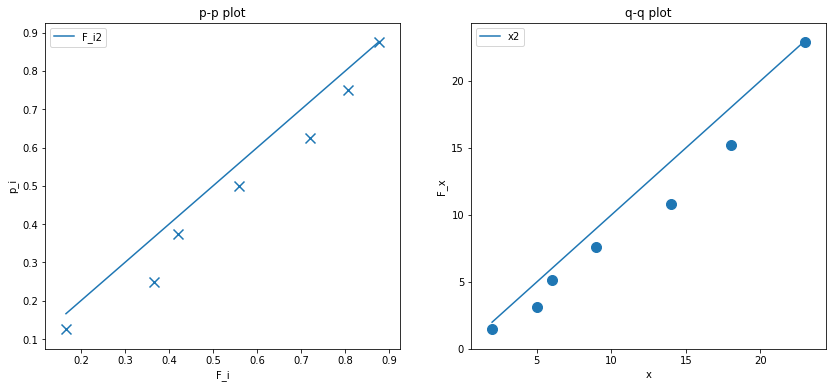

In [4]:
fig = plt.figure(figsize=(14, 6))
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

df.plot('F_i','F_i2', kind='line', ax=ax1)
df.plot('F_i', y='p_i',kind='scatter', marker='x', s=100, ax=ax1)
ax1.set_title('p-p plot')
ax1.set_xlabel('F_i')
ax1.set_ylabel('p_i')

df.plot('x','x2', kind='line', ax=ax2)
df.plot('x', y='F_x',kind='scatter', marker='o', s=100, ax=ax2)
ax2.set_title('q-q plot')
ax2.set_xlabel('x')
ax2.set_ylabel('F_x')
plt.show()

<center>$\diamond$</center>

**Worked Examples for:**
- Estimation 2, Model Evaluation

**References:**

- Nonlife Actuarial Models, Yiu (2009) - Chapter 13